In [1]:
# choose deg=30 or 39
deg = '30'
labels = 'ABCD' if deg=='39' else 'EFGH'

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper', font_scale=1.3)
red, blue, green = sns.color_palette('Set1', 3)

import warnings
warnings.simplefilter('ignore', DeprecationWarning)

In [3]:
import curveball

In [4]:
output_path = '../../figures'
data_path = '../../data'

In [5]:
df = pd.read_excel(f'{data_path}/growth/Evo30vsEvo39_YPD{deg}deg.xlsx', header=None, index_col=0).T
df = df.rename(columns={'time': 'Time'})
df['Time'] /= 60*60 # seconds -> hours
df.head()

,evo30,evo39,evo30,evo39,evo30,evo39,evo30,evo39,evo30,evo39,...,evo39,evo30,evo39,evo30,evo39,evo30,evo39,evo39,evo30,Time
1,0.0650,0.0645,0.0646,0.0646,0.0632,0.0645,0.0633,0.0643,0.0662,0.0655,...,0.0643,0.0625,0.0635,0.0628,0.0648,0.0634,0.0638,0.0641,0.0672,0.000000
2,0.0683,0.0668,0.0666,0.0675,0.0663,0.0683,0.0670,0.0677,0.0669,0.0679,...,0.0664,0.0664,0.0668,0.0661,0.0663,0.0659,0.0677,0.0669,0.0715,0.500278
3,0.0709,0.0702,0.0692,0.0686,0.0688,0.0698,0.0703,0.0711,0.0703,0.0695,...,0.0696,0.0691,0.0701,0.0681,0.0691,0.0696,0.0713,0.0692,0.0732,1.000556
4,0.0740,0.0734,0.0745,0.0733,0.0738,0.0738,0.0732,0.0724,0.0729,0.0728,...,0.0724,0.0720,0.0723,0.0718,0.0718,0.0727,0.0729,0.0722,0.0807,1.500556
5,0.0798,0.0787,0.0798,0.0773,0.0798,0.0784,0.0787,0.0785,0.0795,0.0790,...,0.0766,0.0770,0.0776,0.0761,0.0751,0.0781,0.0774,0.0769,0.0836,2.000556


In [6]:
df = pd.melt(df, id_vars='Time', var_name='Strain', value_name='OD')
df.head()

,Time,Strain,OD
0,0.000000,evo30,0.0650
1,0.500278,evo30,0.0683
2,1.000556,evo30,0.0709
3,1.500556,evo30,0.0740
4,2.000556,evo30,0.0798


In [7]:
df

,Time,Strain,OD
0,0.000000,evo30,0.0650
1,0.500278,evo30,0.0683
2,1.000556,evo30,0.0709
3,1.500556,evo30,0.0740
4,2.000556,evo30,0.0798
...,...,...,...
3111,17.999722,evo30,1.2598
3112,18.500000,evo30,1.2863
3113,19.000278,evo30,1.2913
3114,19.500556,evo30,1.2928


/Users/adsurbum/opt/miniconda3/envs/py371/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


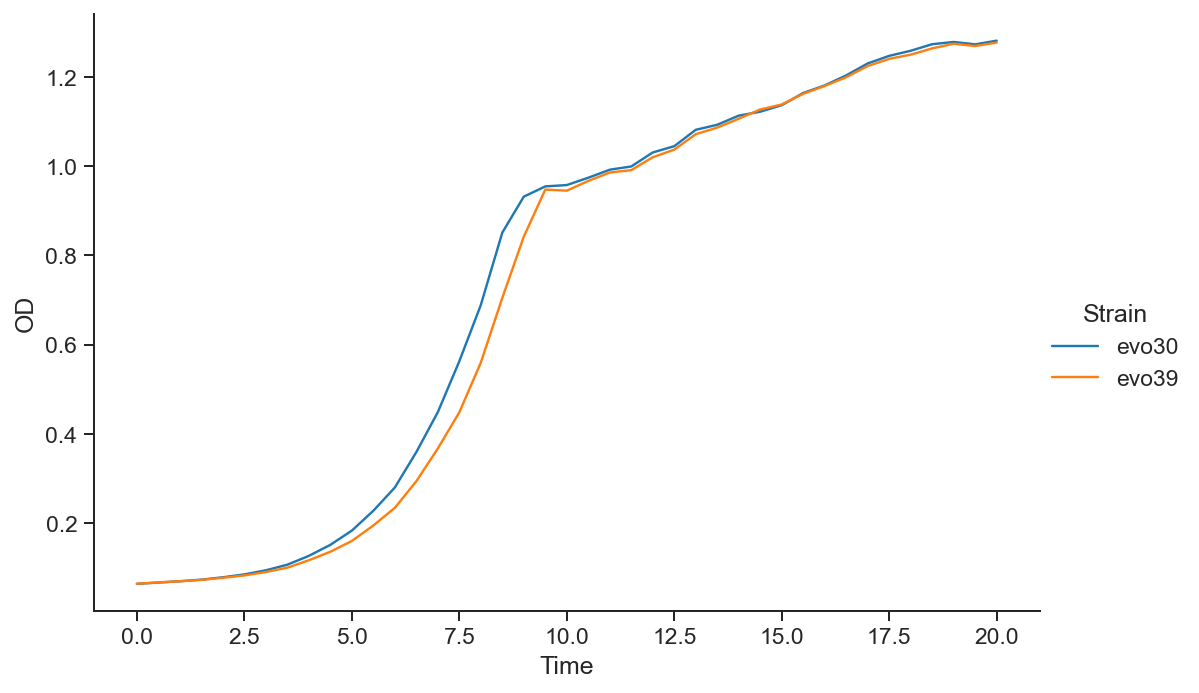

In [8]:
g = curveball.plots.plot_strains(df)
# g.axes[0,0].set(xlim=(0, 13))

In [9]:
df = df[df['Time'] <= 10]

In [10]:
df_evo30 = df[df['Strain']=='evo30']
df_evo39 = df[df['Strain']=='evo39']

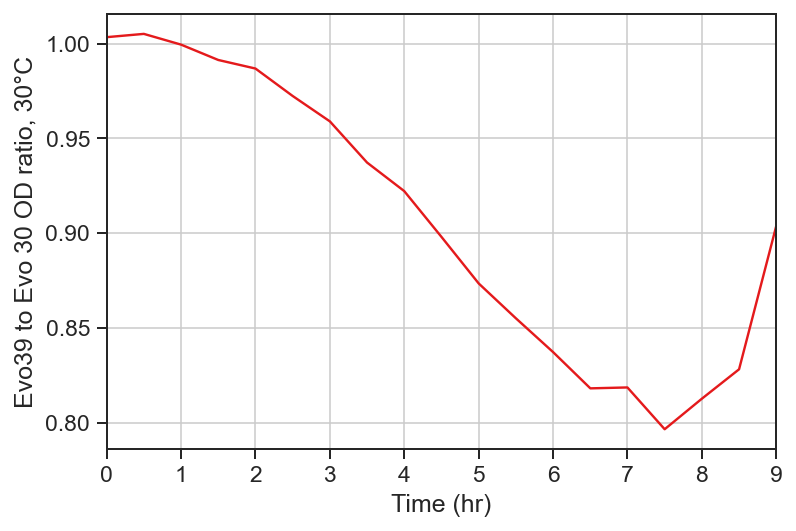

In [11]:
fig, ax = plt.subplots()
od_ratio = df_evo39.groupby('Time').mean() / df_evo30.groupby('Time').mean()
ax.plot(od_ratio.index, od_ratio['OD'], color=red)
ax.set(xlim=(0, 9), xlabel='Time (hr)', ylabel='Evo39 to Evo 30 OD ratio, {}°C'.format(deg))
ax.grid(True);

[[Model]]
    Model(BaranyiRoberts)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 320
    # data points      = 800
    # variables        = 6
    chi-square         = 0.28998478
    reduced chi-square = 3.6522e-04
    Akaike info crit   = -6326.03085
    Bayesian info crit = -6297.92318
[[Variables]]
    y0:  0.06645794 +/- 0.00178046 (2.68%) (init = 0.063905)
    K:   0.95572718 +/- 0.00349723 (0.37%) (init = 0.9545025)
    r:   0.45847113 +/- 0.00700727 (1.53%) (init = 1.030968)
    nu:  9.64866556 +/- 0.94265011 (9.77%) (init = 1)
    q0:  0.06171118 +/- 0.02017532 (32.69%) (init = 0.01741855)
    v:   0.99172053 +/- 0.11368368 (11.46%) (init = 0.9056804)


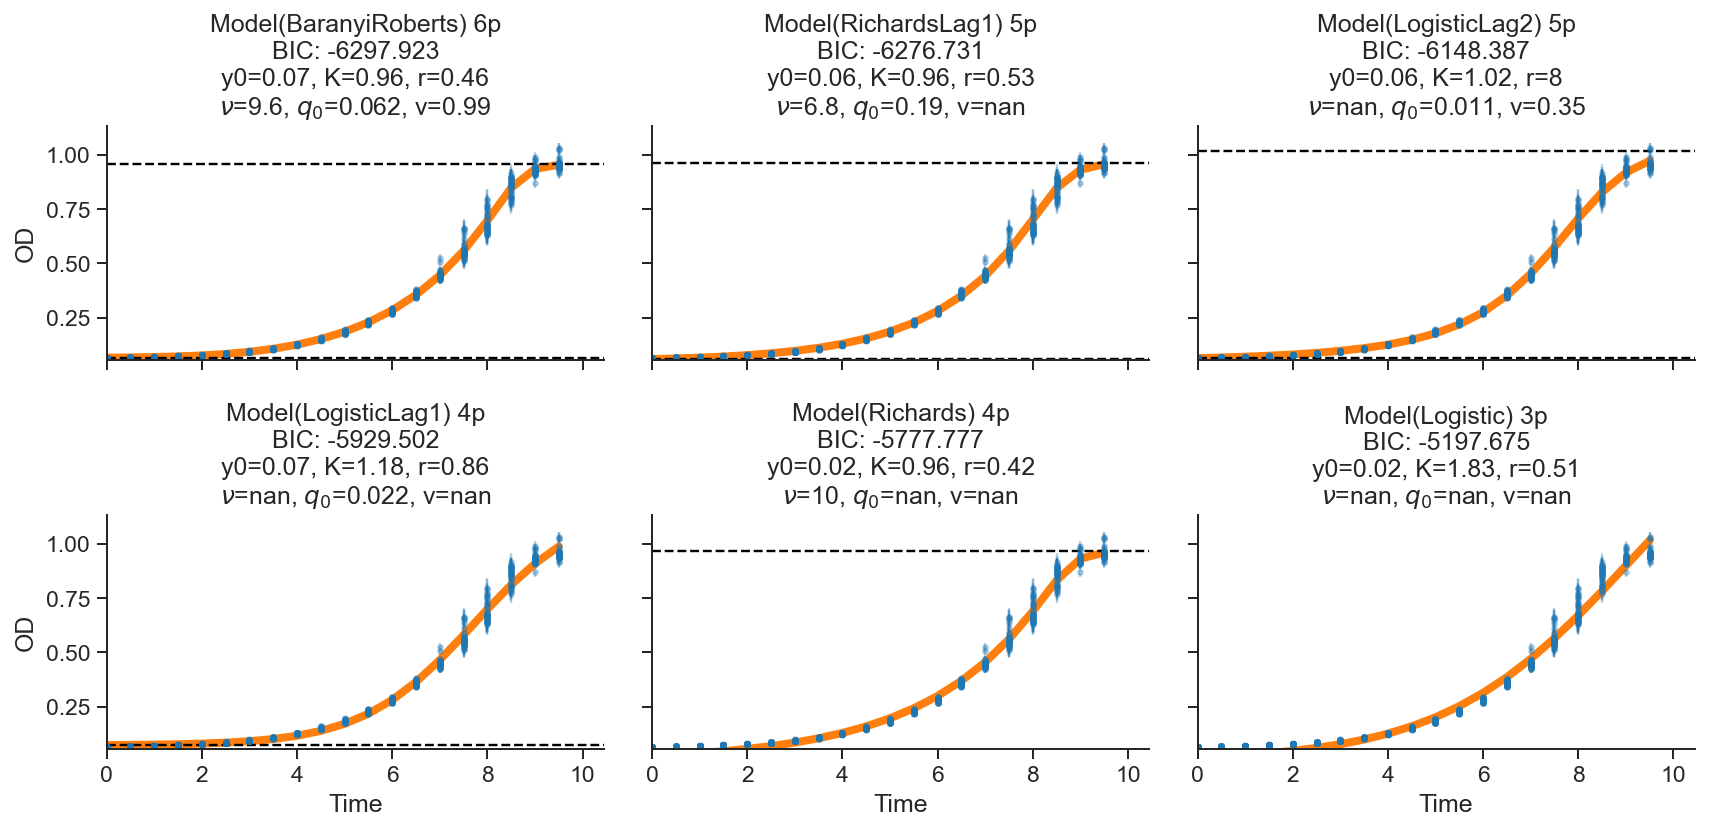

In [12]:
m_evo30, fig, axes = curveball.models.fit_model(df_evo30)

[[Model]]
    Model(RichardsLag1)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 372
    # data points      = 720
    # variables        = 5
    chi-square         = 0.33070518
    reduced chi-square = 4.6252e-04
    Akaike info crit   = -5523.76103
    Bayesian info crit = -5500.86477
[[Variables]]
    y0:  0.06261921 +/- 0.00160523 (2.56%) (init = 0.06411944)
    K:   1.02797048 +/- 0.02294693 (2.23%) (init = 0.947375)
    r:   0.52467547 +/- 0.00988799 (1.88%) (init = 1.419848)
    nu:  4.88653035 +/- 0.71464947 (14.62%) (init = 1)
    q0:  0.14156338 +/- 0.01541257 (10.89%) (init = 0.02415102)


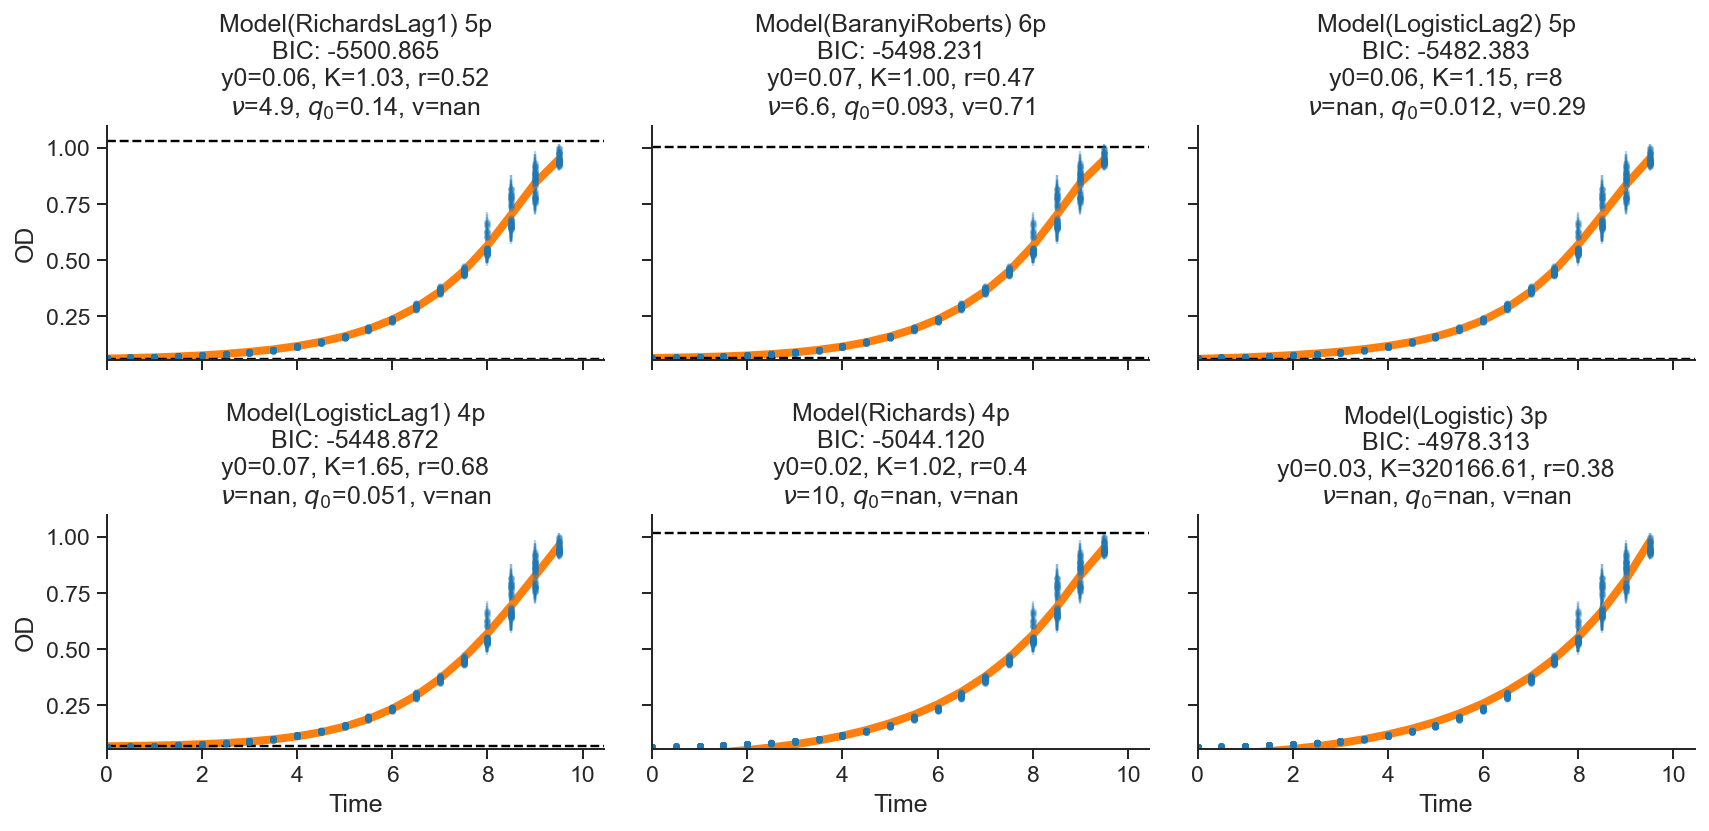

In [13]:
m_evo39, fig, axes = curveball.models.fit_model(df_evo39)

In [14]:
y0 = (m_evo30[0].params['y0'].value, m_evo39[0].params['y0'].value)
print(y0)
y0 = np.mean(y0)/2, np.mean(y0)/2
print(y0)

(0.0664579448636804, 0.0626192142098636)
(0.032269289768386, 0.032269289768386)


/Users/adsurbum/opt/miniconda3/envs/py371/lib/python3.7/site-packages/curveball/competitions.py:343: UserWarning: 3531 resamples lost
  warnings.warn("{0} resamples lost".format(nsamples - min_nsamples))


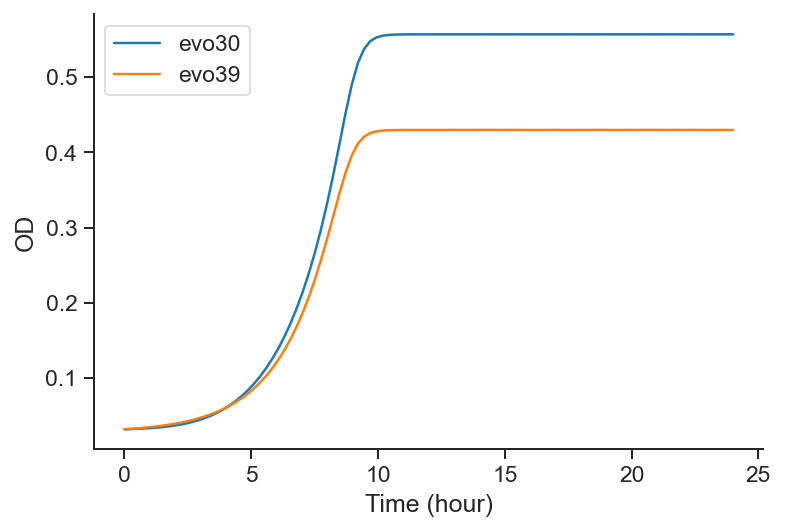

In [15]:
t, y, fig, ax = curveball.competitions.compete(m_evo30[0], m_evo39[0], y0=y0, PLOT=True, nsamples=10000)
# y = y.squeeze()
ax.legend(['evo30', 'evo39']);

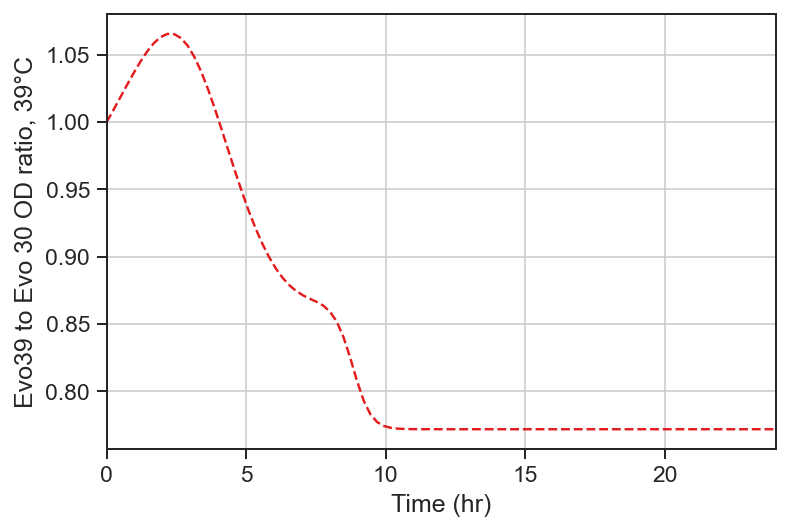

In [16]:
fig, ax = plt.subplots()

od_ratio_hat = y[:, 1].mean(axis=1)/y[:, 0].mean(axis=1)
ax.plot(t, od_ratio_hat, color=red, ls='--')
# ax.plot(od_ratio.index, od_ratio['OD'], color=red)
ax.set(xlim=(0, 24), xlabel='Time (hr)', ylabel='Evo39 to Evo 30 OD ratio, 39°C')
ax.grid(True)

/Users/adsurbum/opt/miniconda3/envs/py371/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


w = 0.9864 (95% CI 0.9793 - 0.9938)


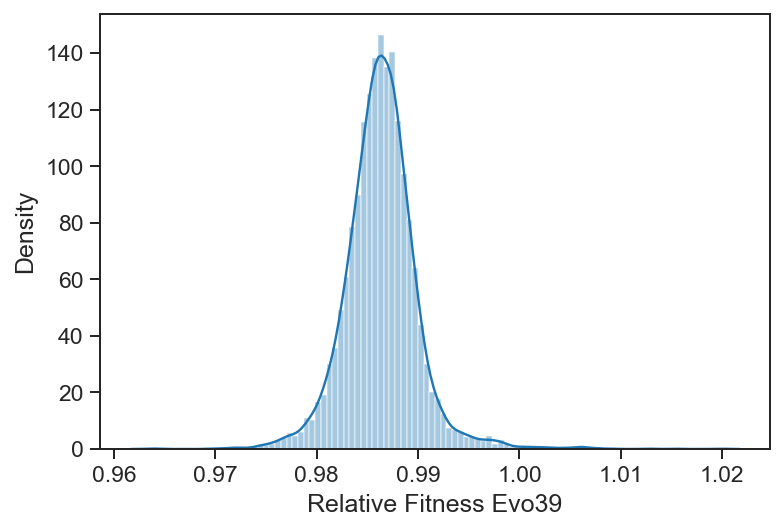

In [17]:
w = np.array([curveball.competitions.fitness_LTEE(y[:,:,i]) for i in range(y.shape[2])])
s = w - 1
s  /= np.log2(100) # convert from 24 hr to generations
w = 1 + s
ax = sns.distplot(w, bins=100, kde=True)
ax.set(xlabel='Relative Fitness Evo39', ylabel='Density');
print("w = {:.4f} (95% CI {:.4f} - {:.4f})".format(
    w.mean(), np.percentile(w, 2.5), np.percentile(w, 97.5)
))

## uncomment cell bellow to save the result for prior

In [18]:
# np.savez_compressed('evo39_fitness_{}deg.npz'.format(deg), w)

/Users/adsurbum/opt/miniconda3/envs/py371/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


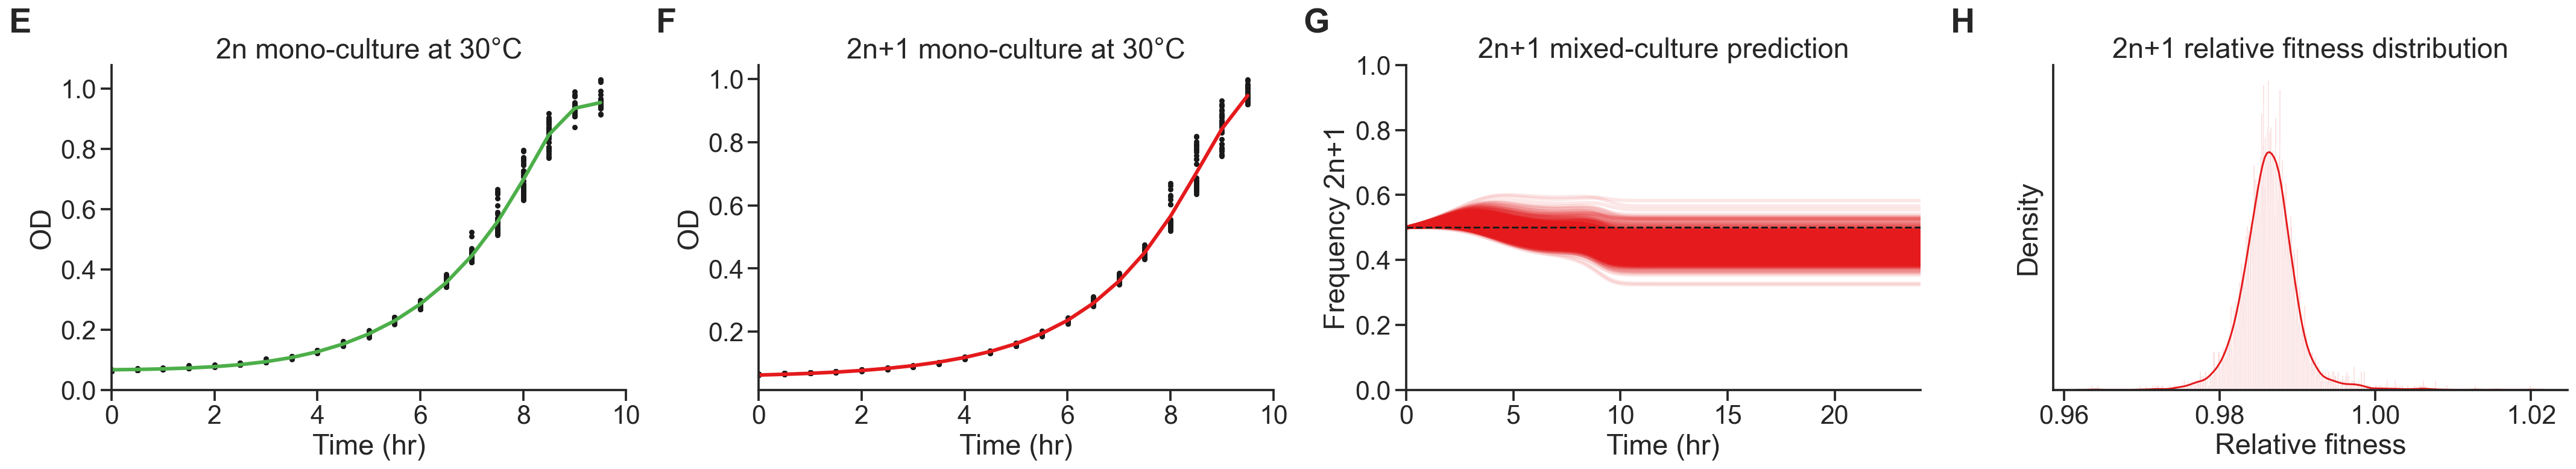

In [19]:
import seaborn as sns
sns.set(style="ticks",context='talk' ,rc={"lines.linewidth": 1.5, 'lines.markersize': 7},font_scale=1.3)

fig, axes = plt.subplots(1, 4, figsize=(30, 6))
# mono-culture
data_kws = dict(color='k', marker='.')
evo30_kws = dict(color=green, lw=3)
evo39_kws = dict(color=red, lw=3)
m_evo30[0].plot_fit(ax=axes[0], fit_kws=evo30_kws, data_kws=data_kws)
m_evo39[0].plot_fit(ax=axes[1], fit_kws=evo39_kws, data_kws=data_kws)
for ax in axes[0:1]:
    ax.set(xlim=(0, None), ylim=(0, None))
axes[0].set(title=f"2n mono-culture at {deg}°C", ylabel='OD', xlabel='Time (hr)', xlim=(0,10))
axes[1].set(title=f"2n+1 mono-culture at {deg}°C", ylabel='OD', xlabel='Time (hr)', xlim=(0,10))

# competition
axes[2].plot(t, y[:,1,:]/y.sum(axis=1), **evo39_kws, alpha=0.1)
axes[2].set(title="2n+1 mixed-culture prediction", ylabel='Frequency 2n+1', xlim=(0,24), ylim=(0,1), xlabel='Time (hr)')
axes[2].axhline(0.5, ls='--', color='k')

# fitness
sns.distplot(w, bins=1000, kde=True, color=red,  ax=axes[3])
axes[3].set(title='2n+1 relative fitness distribution', xlabel='Relative fitness', ylabel='Density')
axes[3].set_ylabel('Density', labelpad=10)
axes[3].axes.yaxis.set_ticks([])


# leftovers
for ax in axes.flat:
    ax.legend().set_visible(False)   
    
sns.despine()
axes[0].text(-0.2, 1.1, labels[0], transform=axes[0].transAxes, size=28, weight='bold')
axes[1].text(-0.2, 1.1, labels[1], transform=axes[1].transAxes, size=28, weight='bold')
axes[2].text(-0.2, 1.1, labels[2], transform=axes[2].transAxes, size=28, weight='bold')
axes[3].text(-0.2, 1.1, labels[3], transform=axes[3].transAxes, size=28, weight='bold')
fig.tight_layout()

fig.savefig(f'{output_path}/evo39_fitness_{deg}deg.pdf')